In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
path_revision = 'Revision'

In [3]:
def get_tables_openmp(base_path, report_name):
    res = []

    for i in range(1,5):
        index = pow(2, i)
        res.append(pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt').to_numpy())
    
    return res

In [4]:
def get_tables_TBB(base_path, report_name):
    return pd.read_csv(base_path + '/TBB/' + report_name + '.txt').to_numpy() 

In [5]:
def get_table_sequential(base_path, report_name):
    return pd.read_csv(base_path + '/Sequential/' + report_name + '.txt').to_numpy() 

In [6]:
openMP_revision = get_tables_openmp(path_revision, 'report_Synthetic_Graph')

In [7]:
tbb_revision = get_tables_TBB(path_revision, 'report_Synthetic_Graph')

In [8]:
sequential_revision = get_table_sequential(path_revision, 'report_Synthetic_Graph')

In [9]:
def create_row(seq, open, idx, idy):
    tmp_row = [seq[idx, idy]]

    for i in range(4):
        tmp_row.append(open[i][idx, idy])
    
    return tmp_row

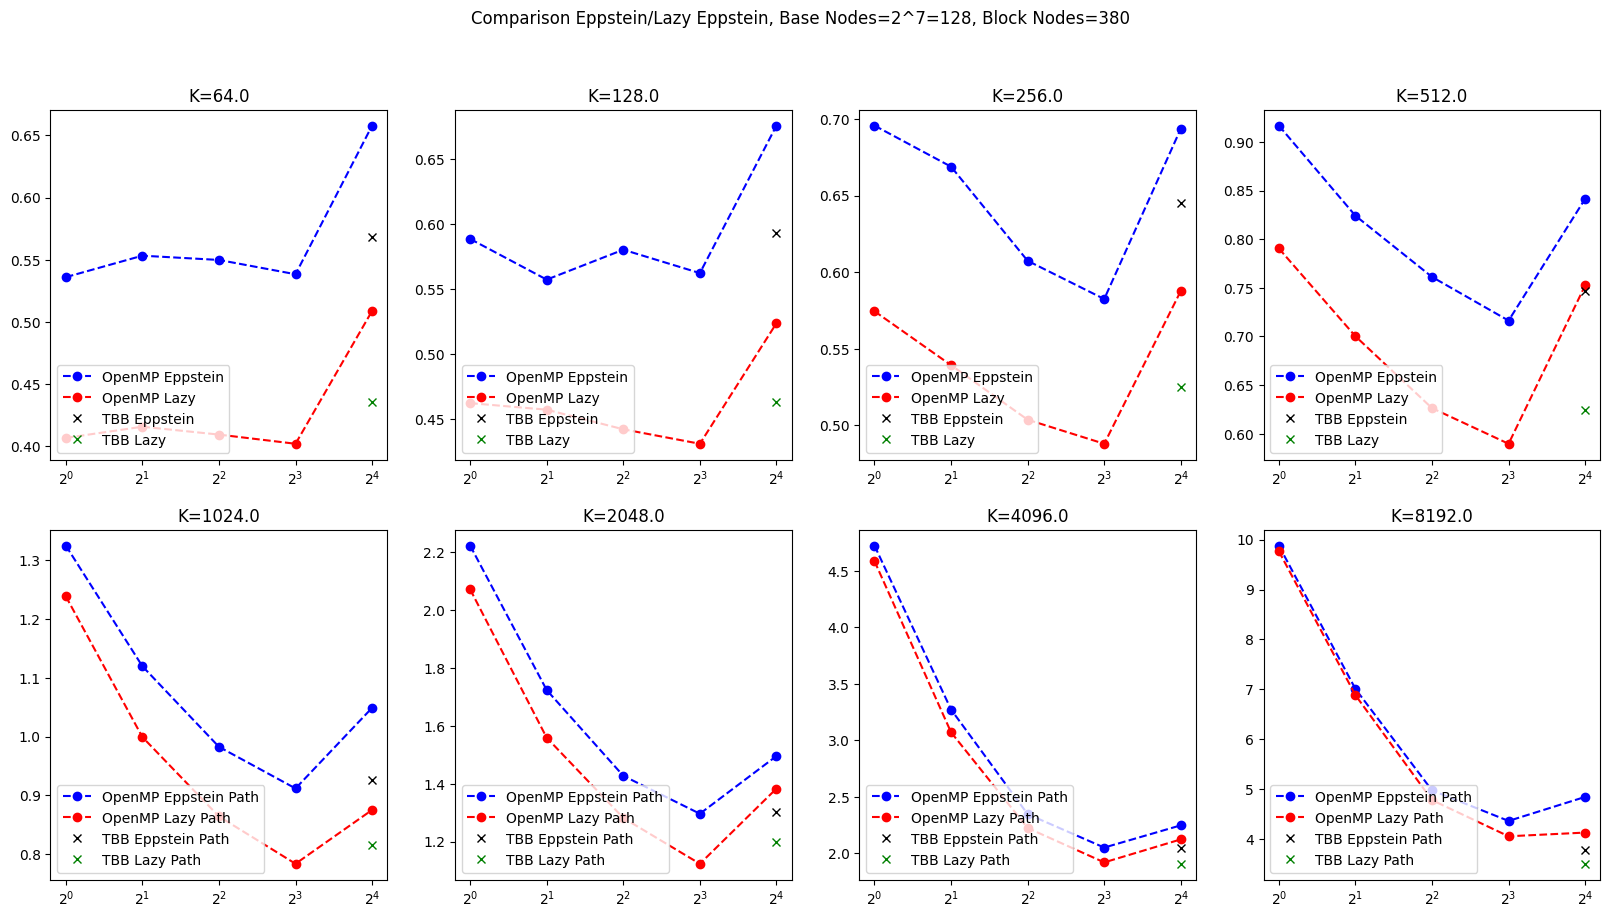

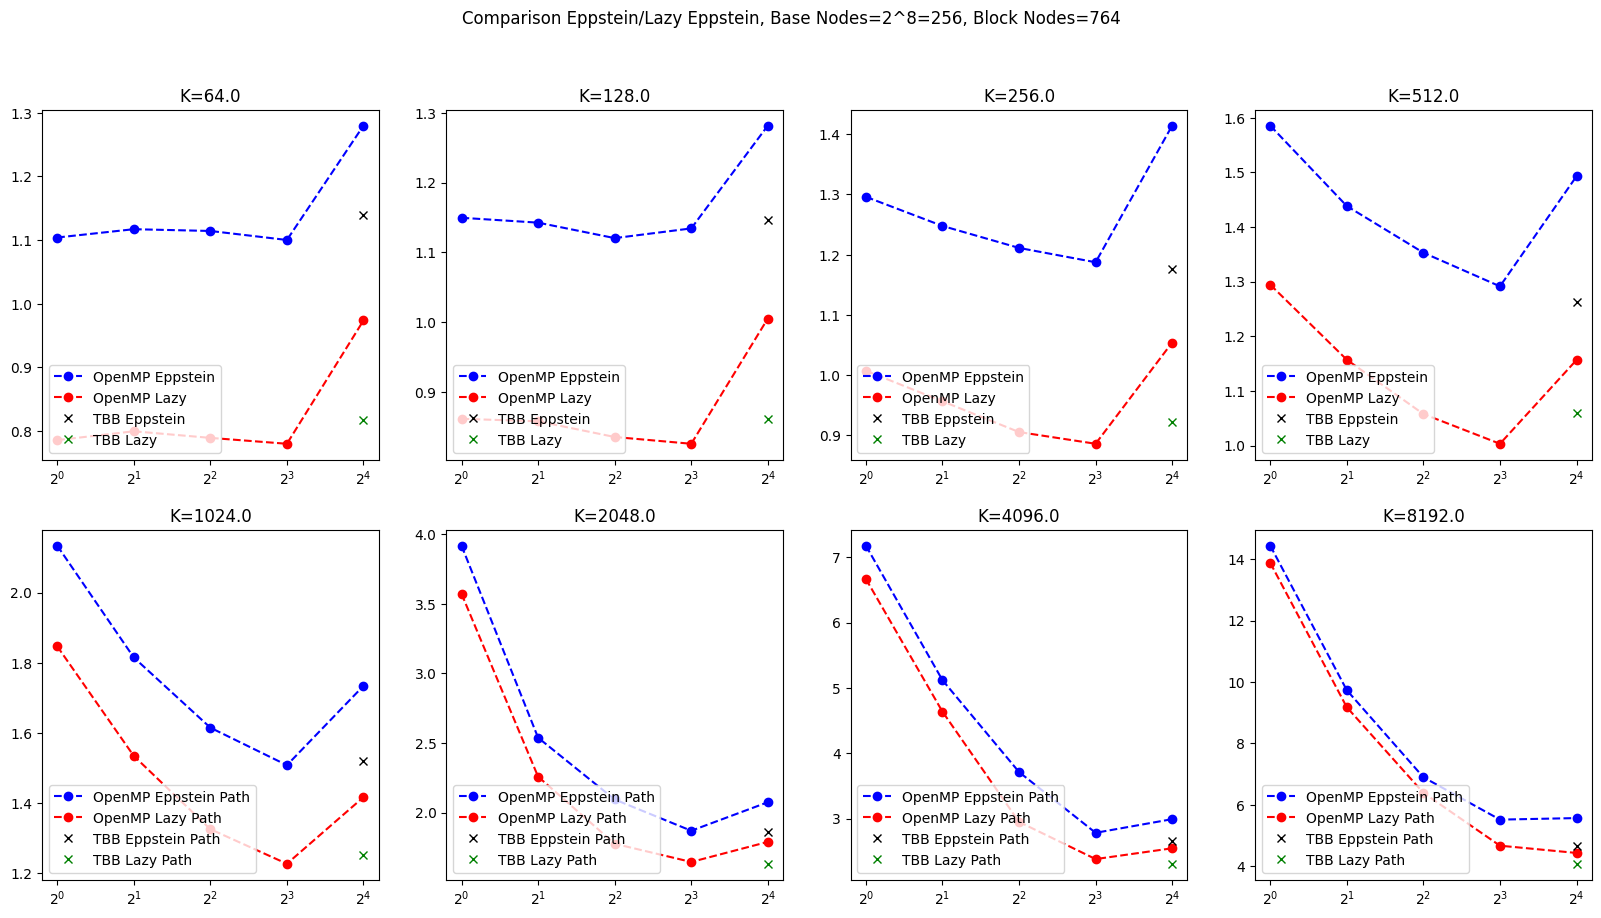

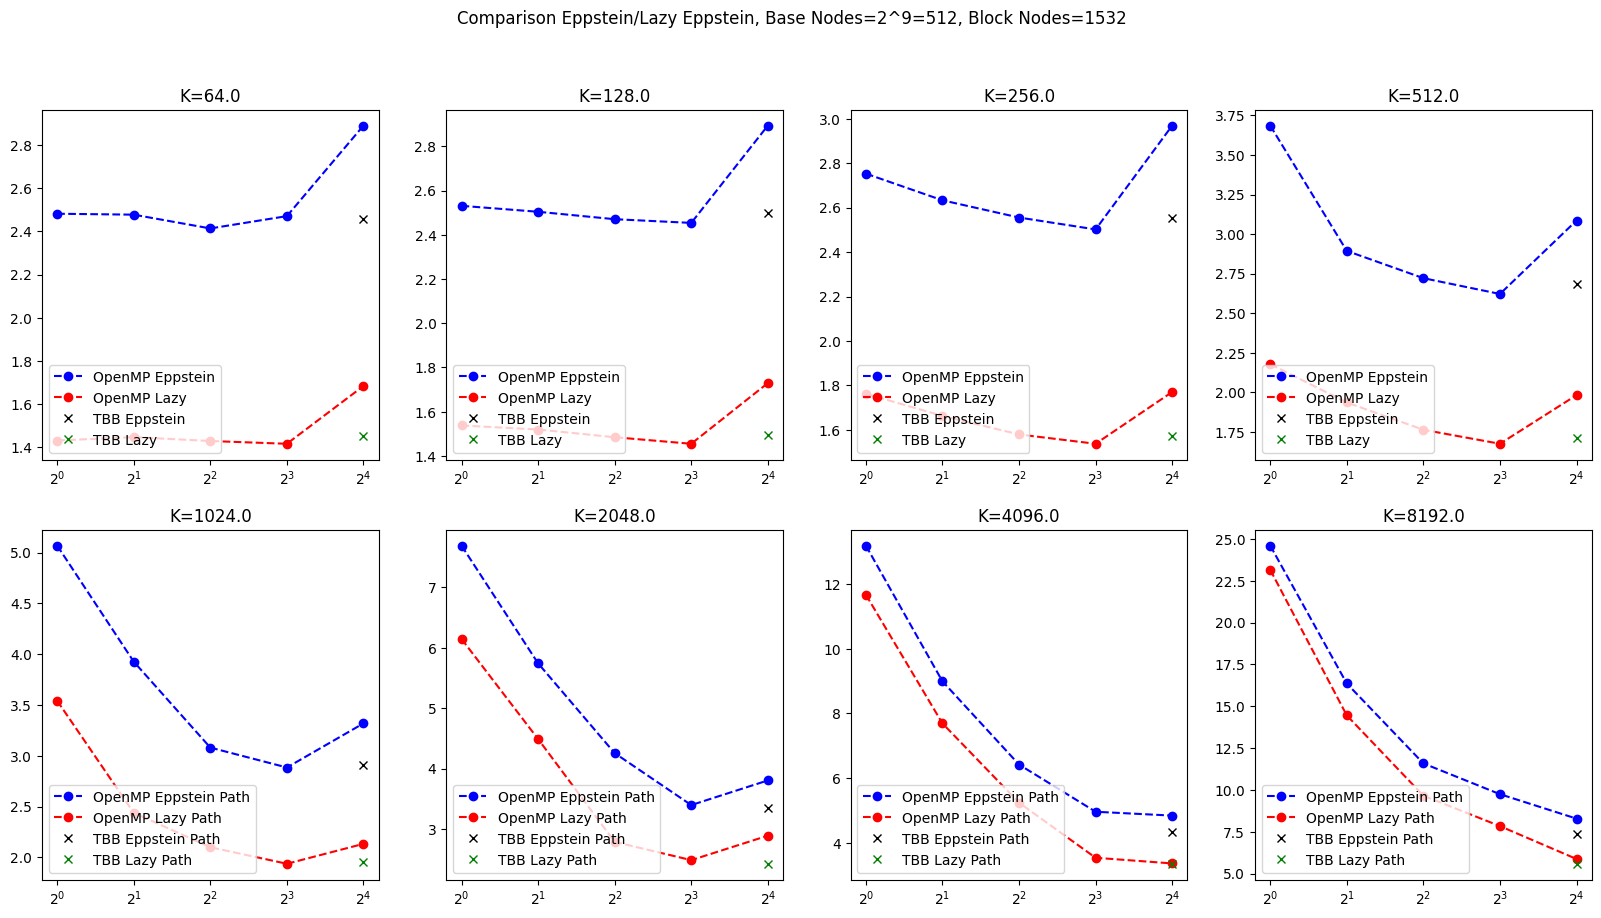

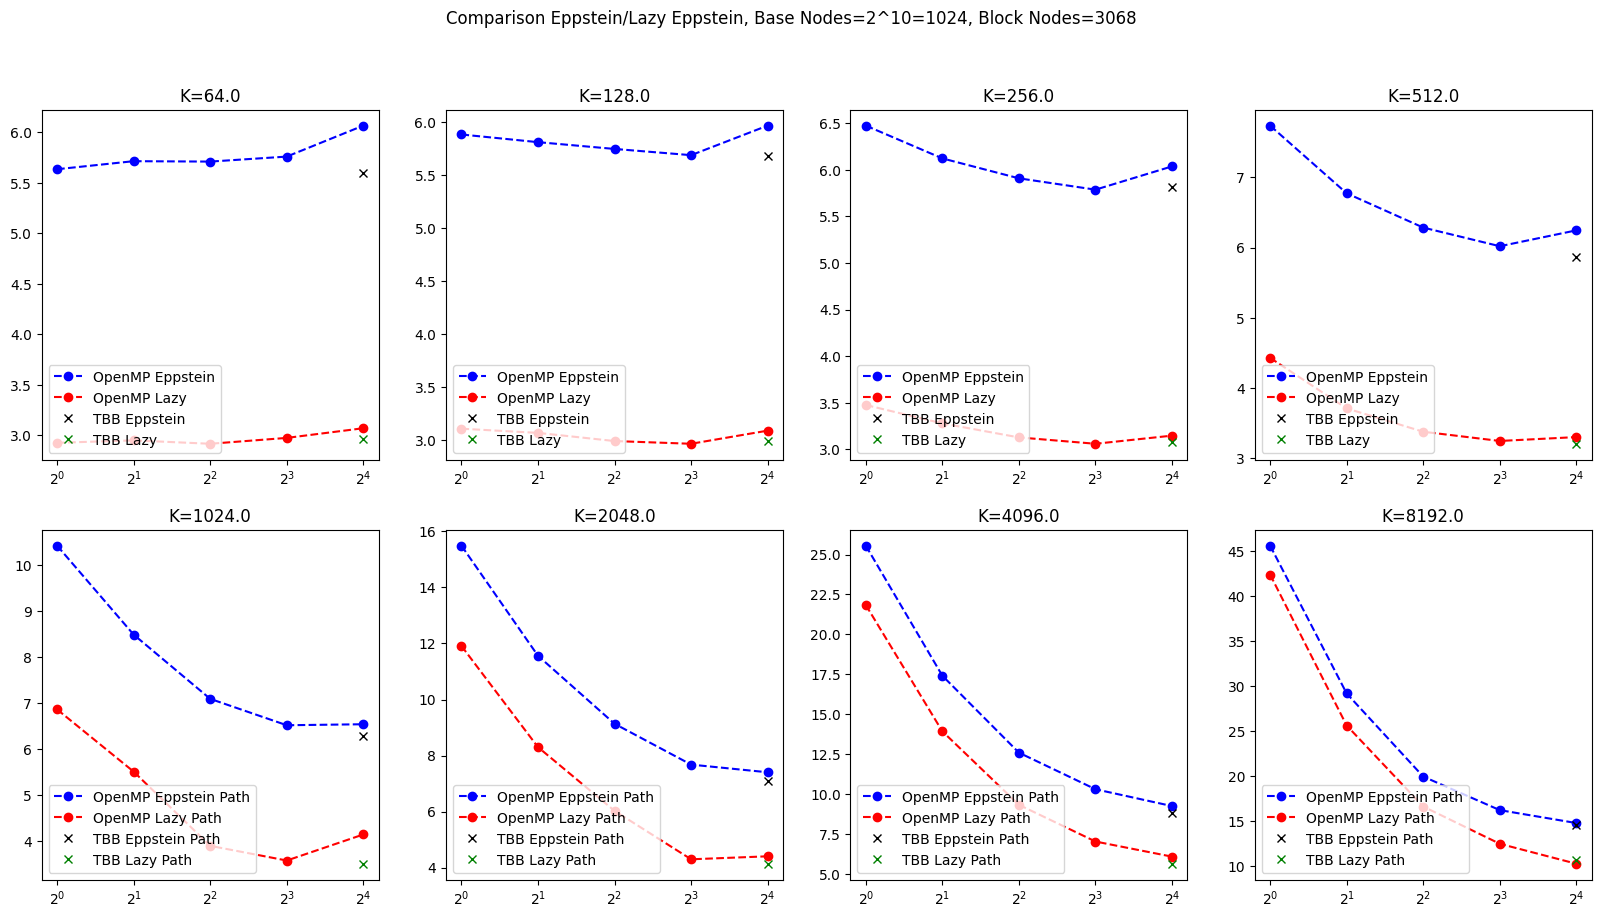

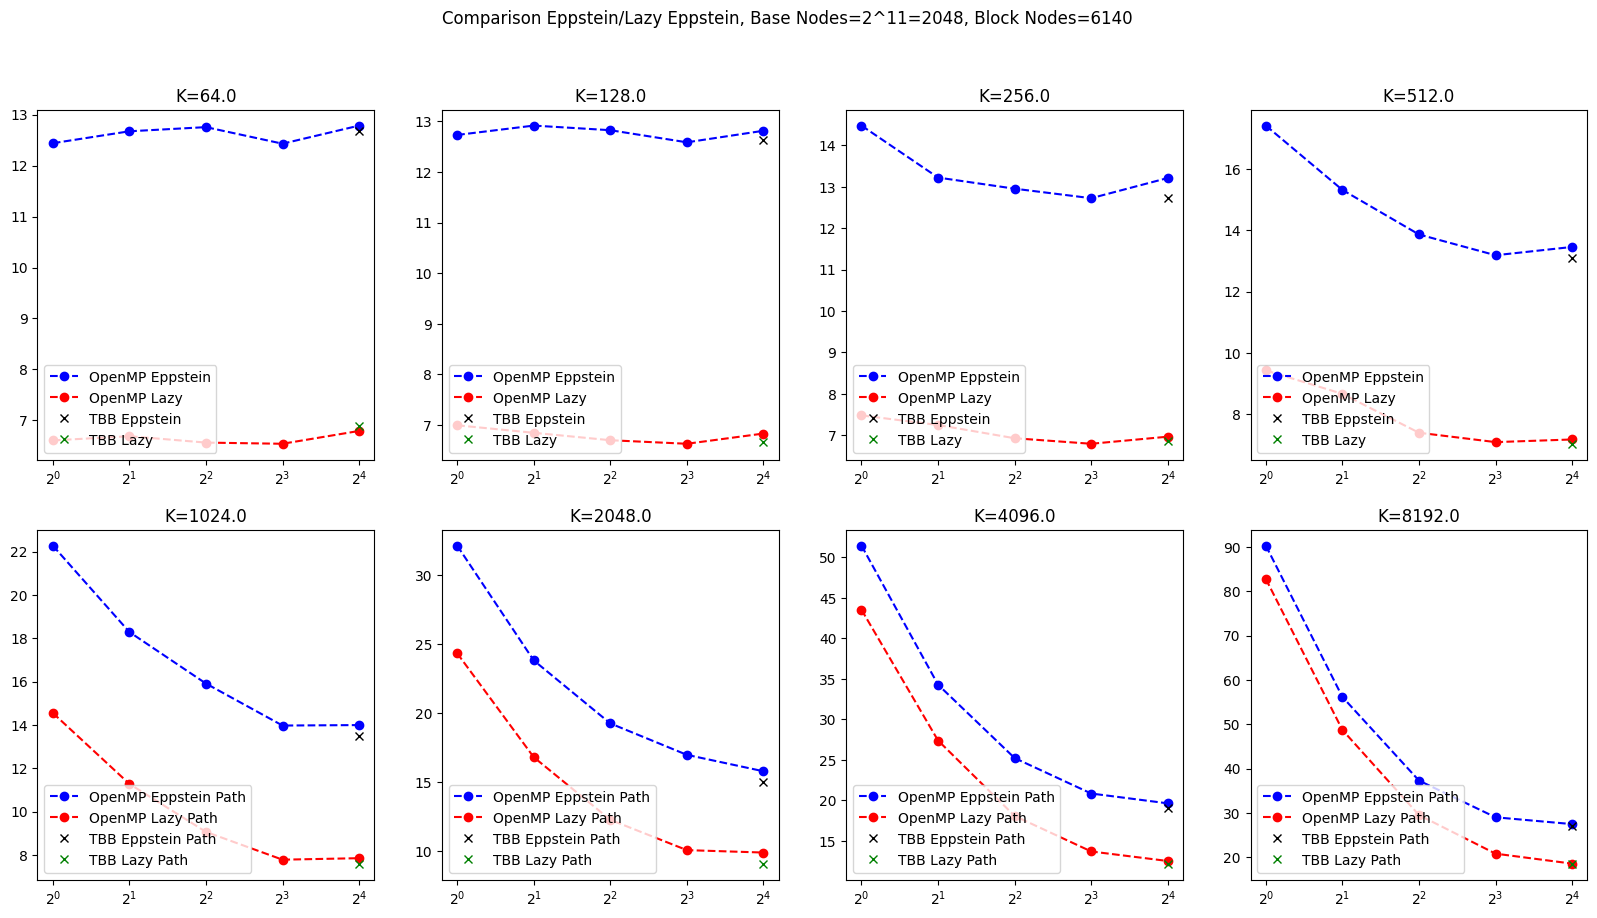

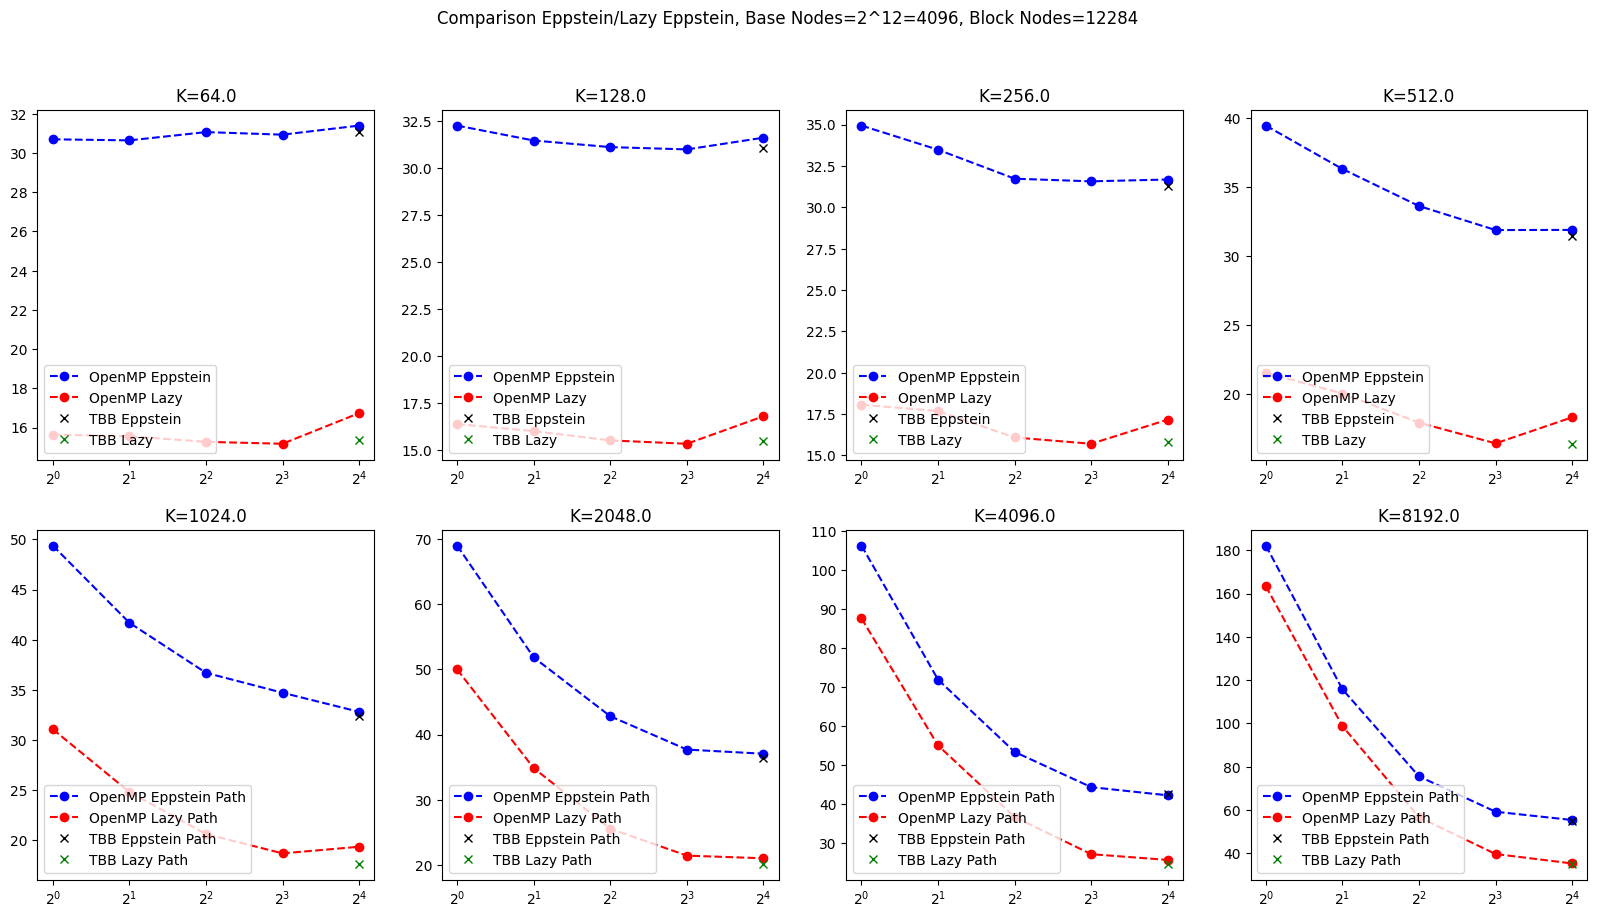

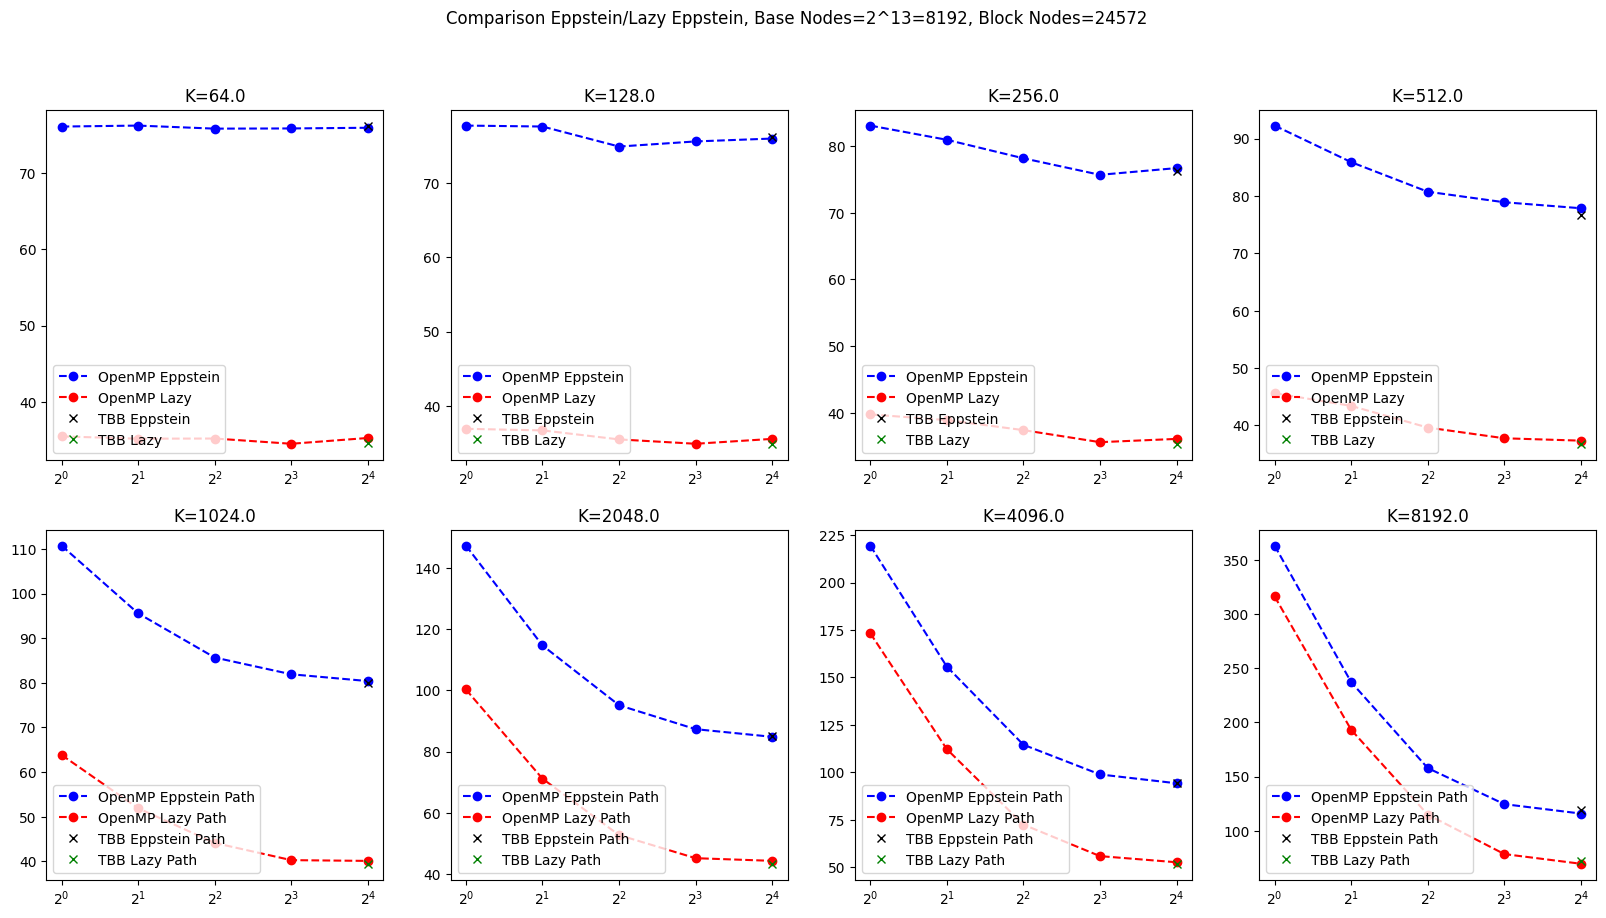

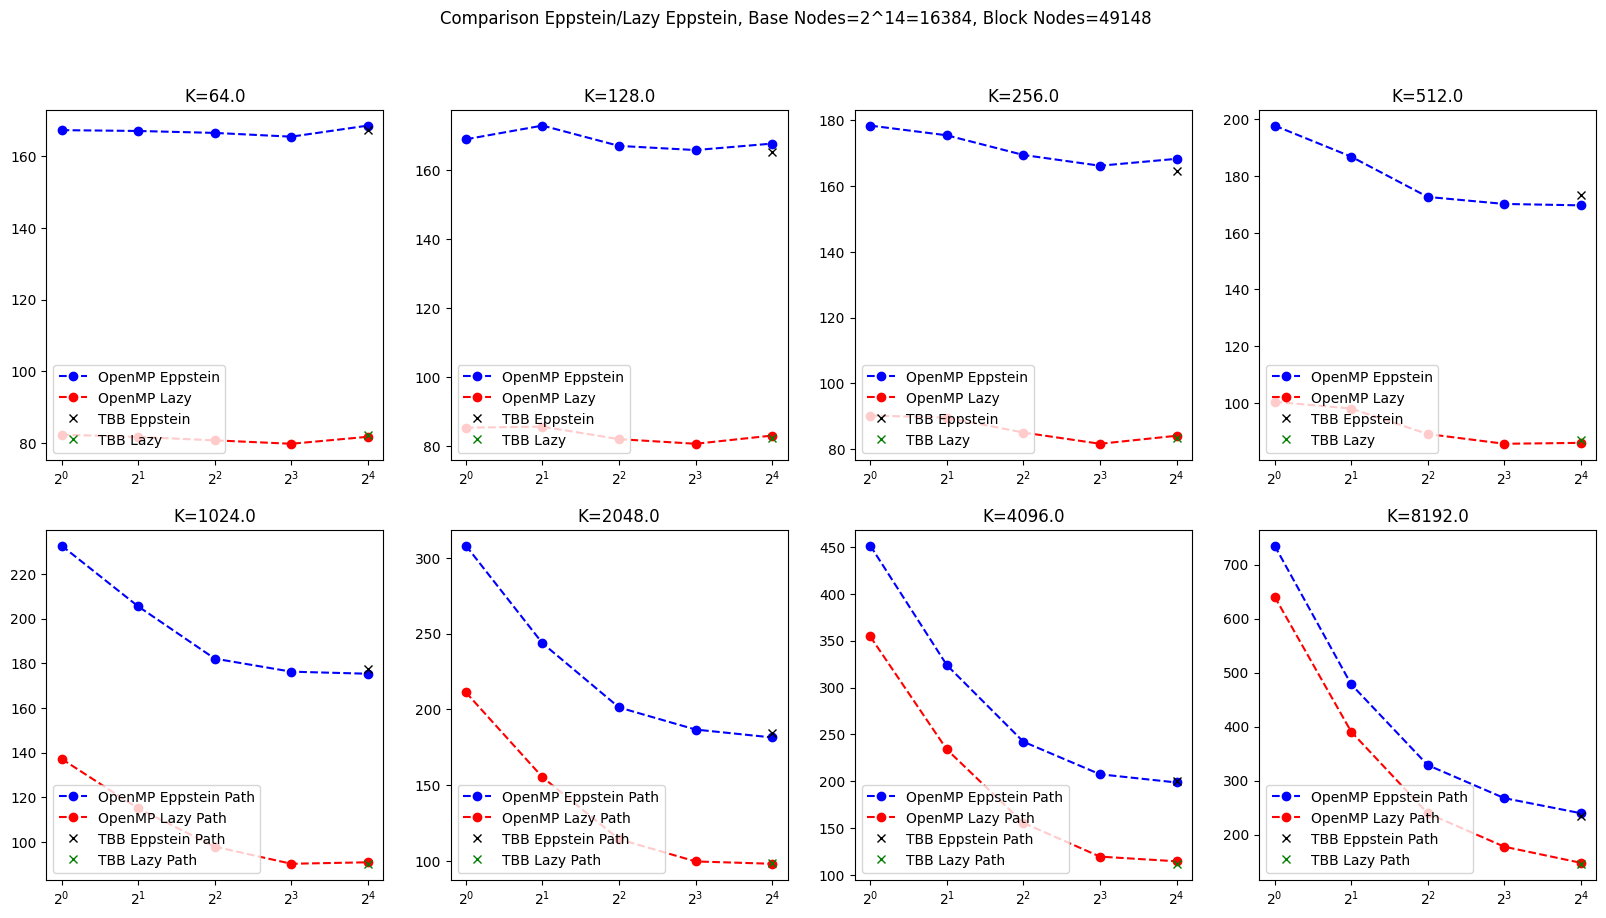

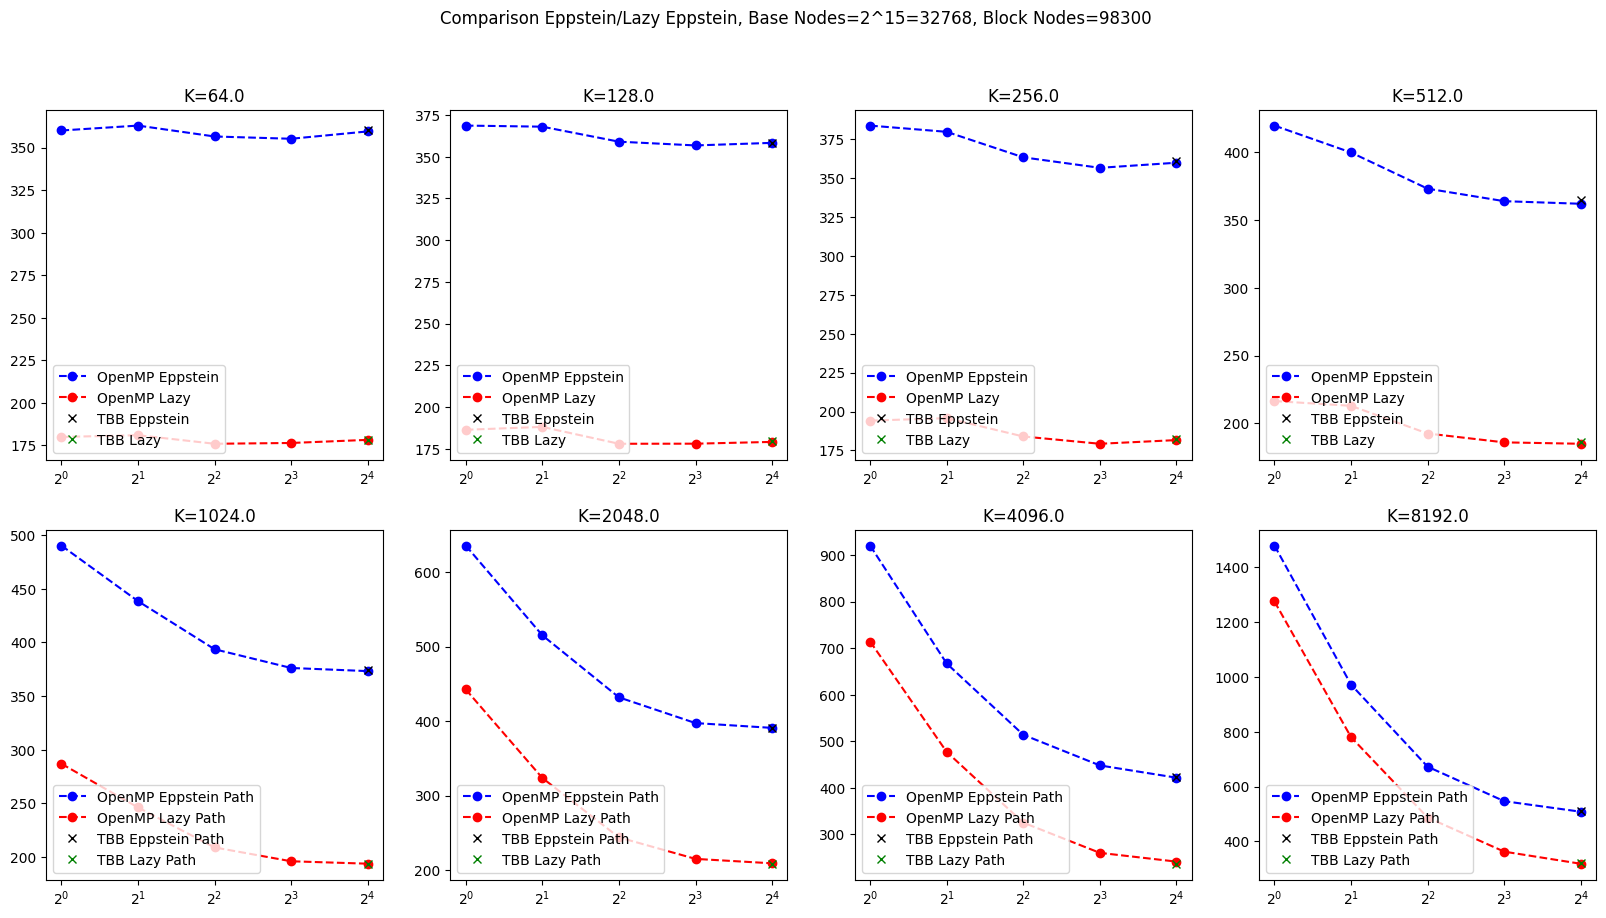

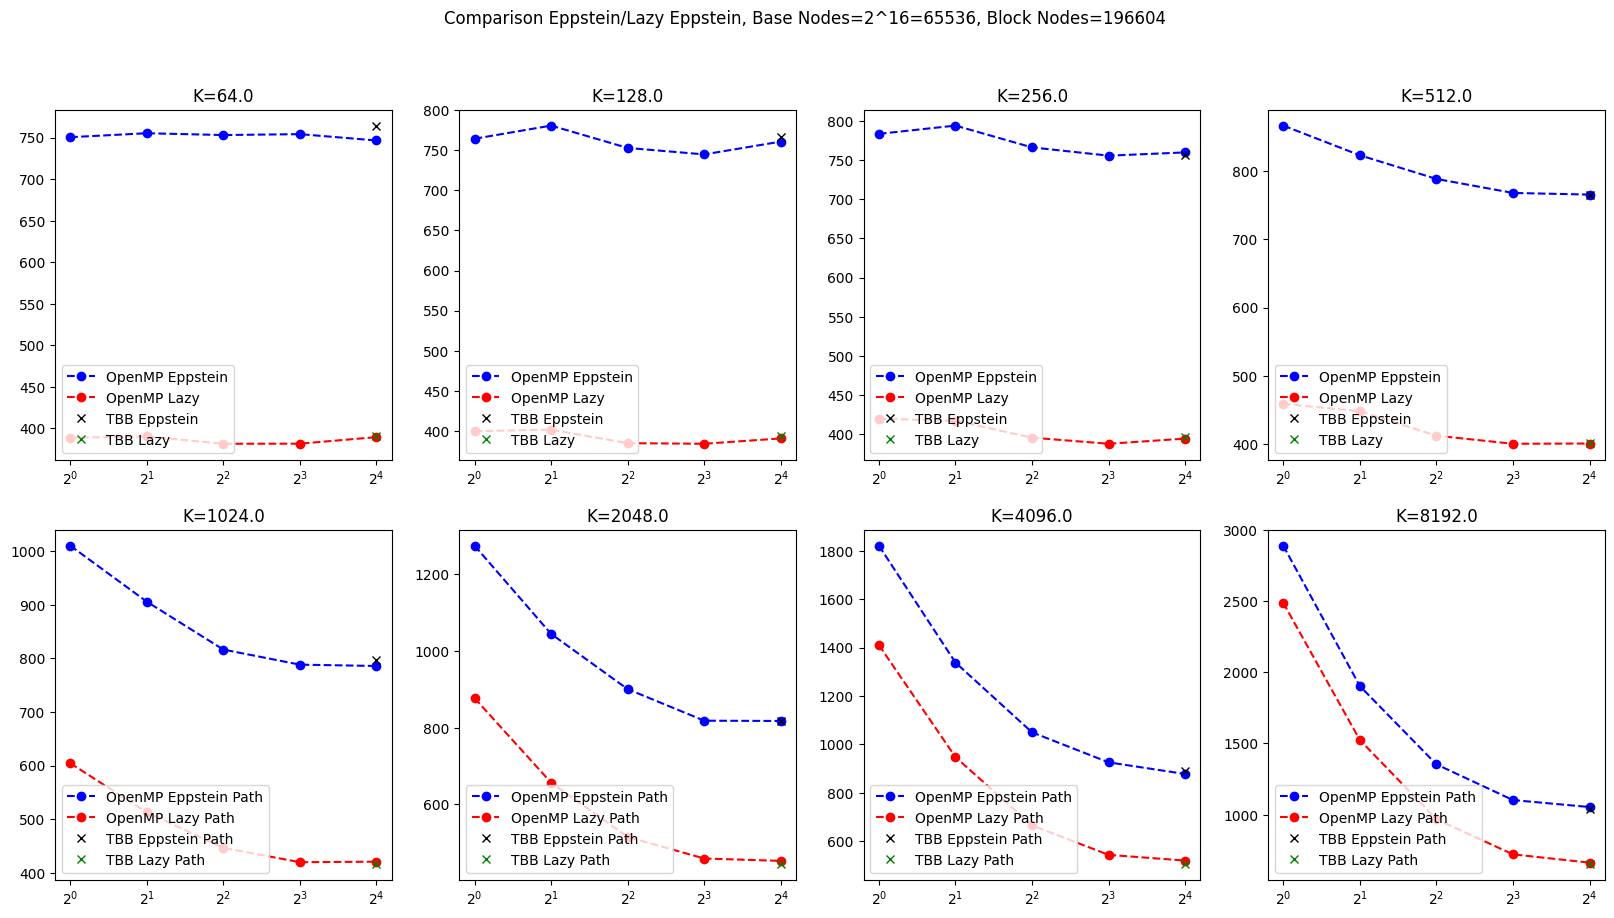

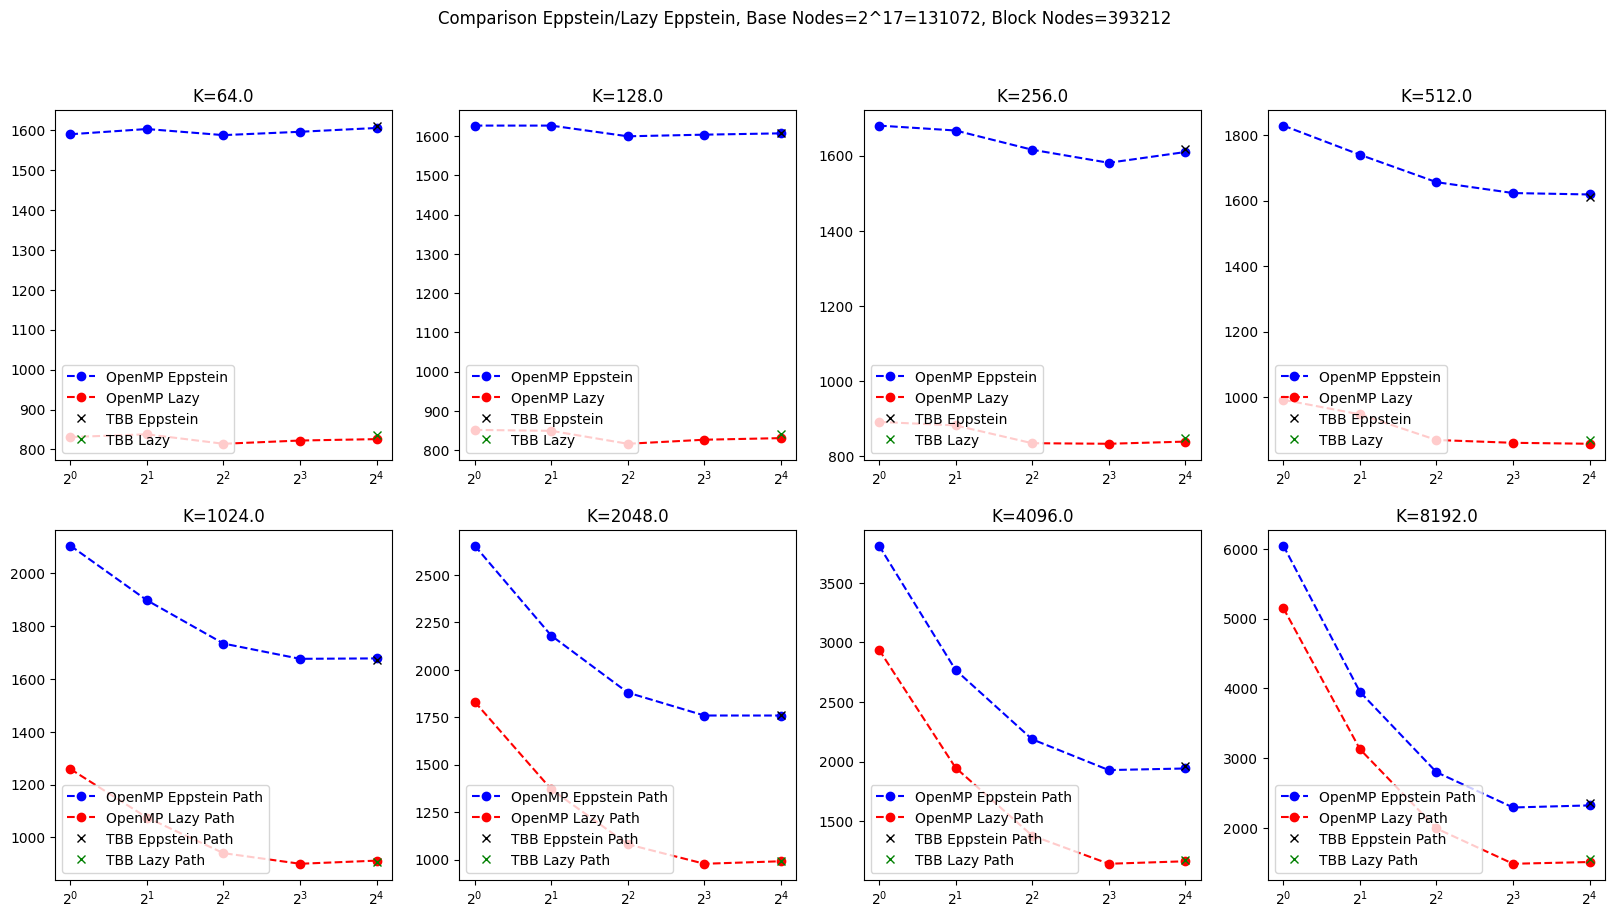

In [10]:
for i in range(11):
    fix, axs = plt.subplots(2, 4, figsize=(20, 10))

    fix.suptitle('Comparison Eppstein/Lazy Eppstein, Base Nodes=2^' + str(i+7) + '=' + str(pow(2,i+7)) + ", Block Nodes=" + str((pow(2,i+7)-2)*3+2))

    base_index = (i+2) * 8;

    for j in range(4):
        up = base_index + j


        axs[0, j].set_title('K=' + str(sequential_revision[up, 1]))
        
        axs[0, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, up, 3), '--bo')
        axs[0, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, up, 5), '--ro')
        axs[0, j].plot(16, tbb_revision[up, 3], 'kx')
        axs[0, j].plot(16, tbb_revision[up, 5], 'gx')

        axs[0, j].legend(['OpenMP Eppstein', 'OpenMP Lazy', 'TBB Eppstein', 'TBB Lazy'], loc='lower left')
        axs[0, j].set_xscale('log', base=2)


        dn = base_index + j + 4
        axs[1, j].set_title('K=' + str(sequential_revision[dn, 1]))

        axs[1, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, dn, 3), '--bo')
        axs[1, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, dn, 5), '--ro')
        axs[1, j].plot(16, tbb_revision[dn, 3], 'kx')
        axs[1, j].plot(16, tbb_revision[dn, 5], 'gx')

        axs[1, j].legend(['OpenMP Eppstein Path', 'OpenMP Lazy Path', 'TBB Eppstein Path', 'TBB Lazy Path'], loc='lower left')
        axs[1, j].set_xscale('log', base=2)

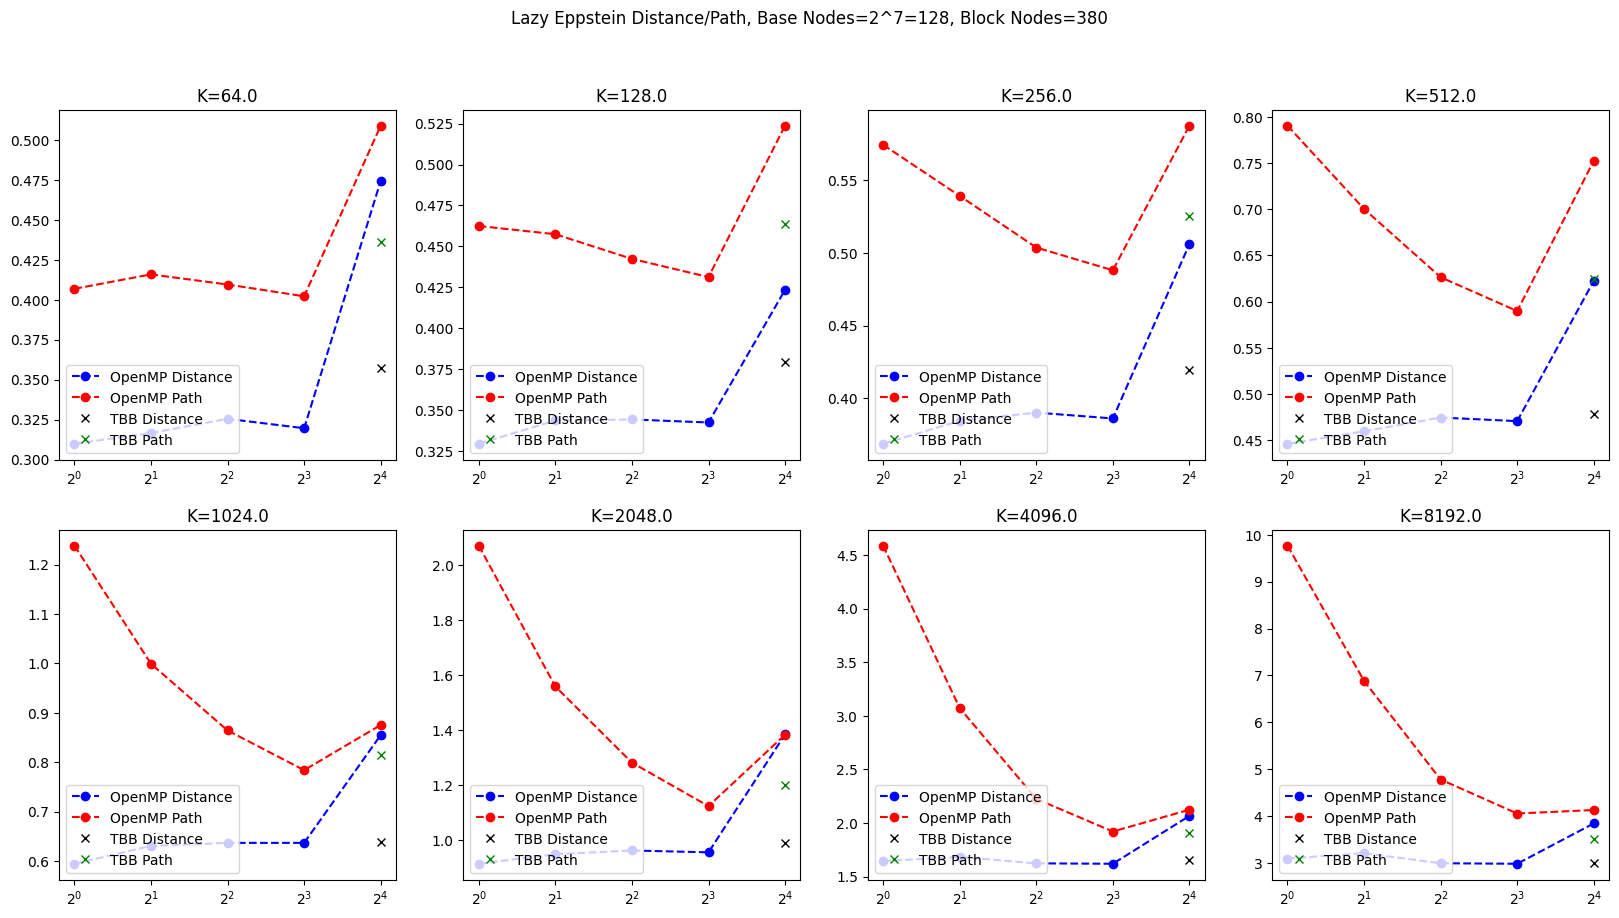

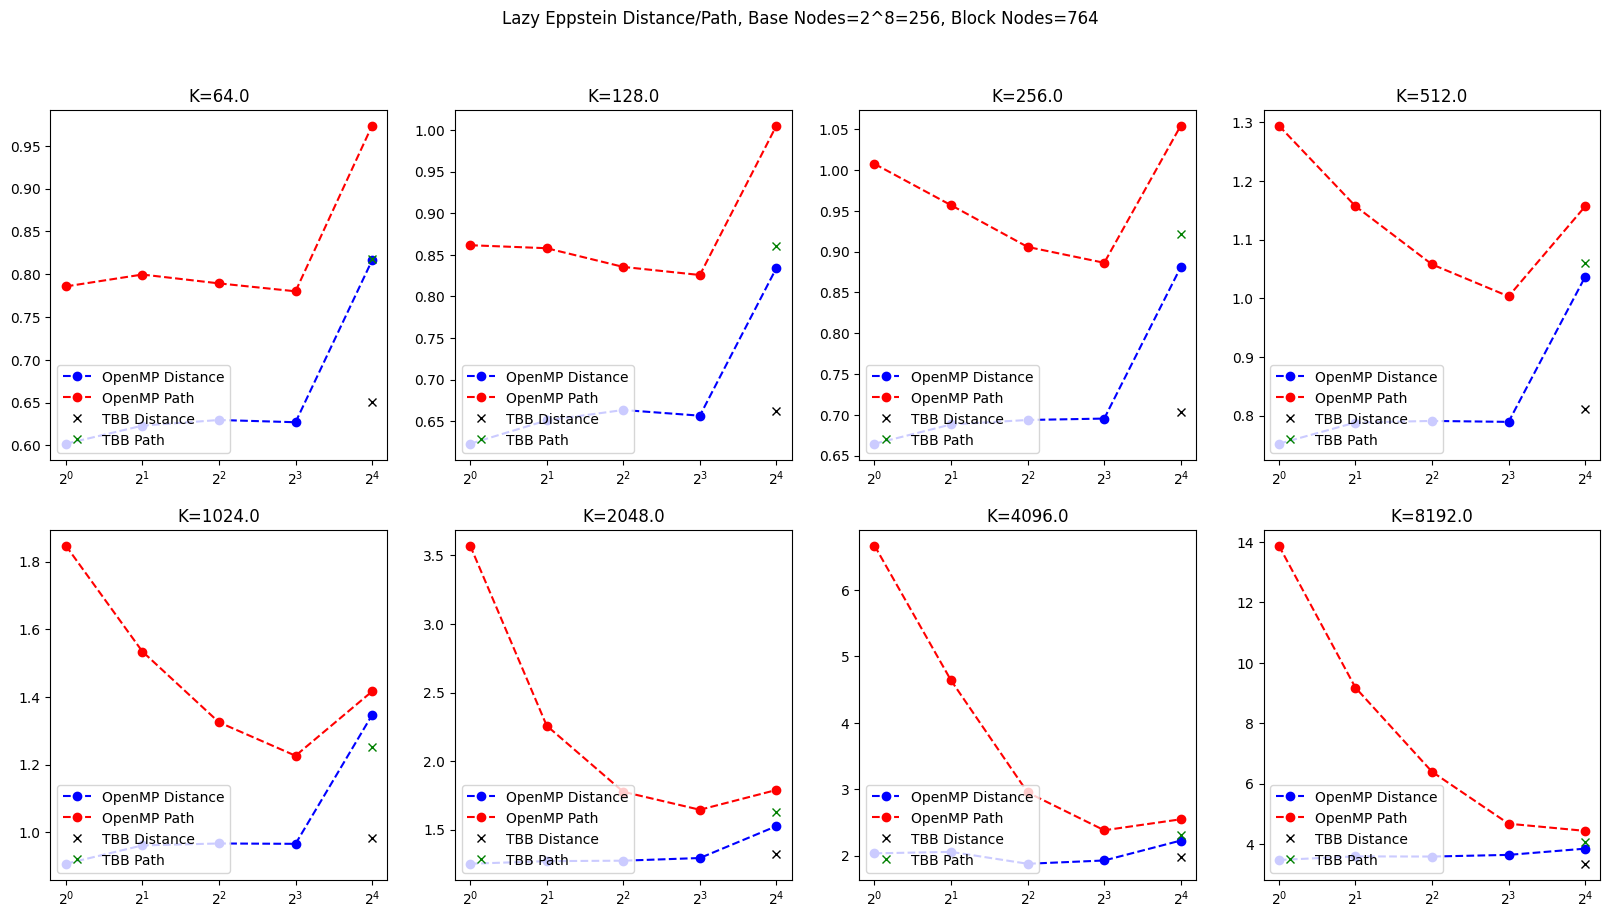

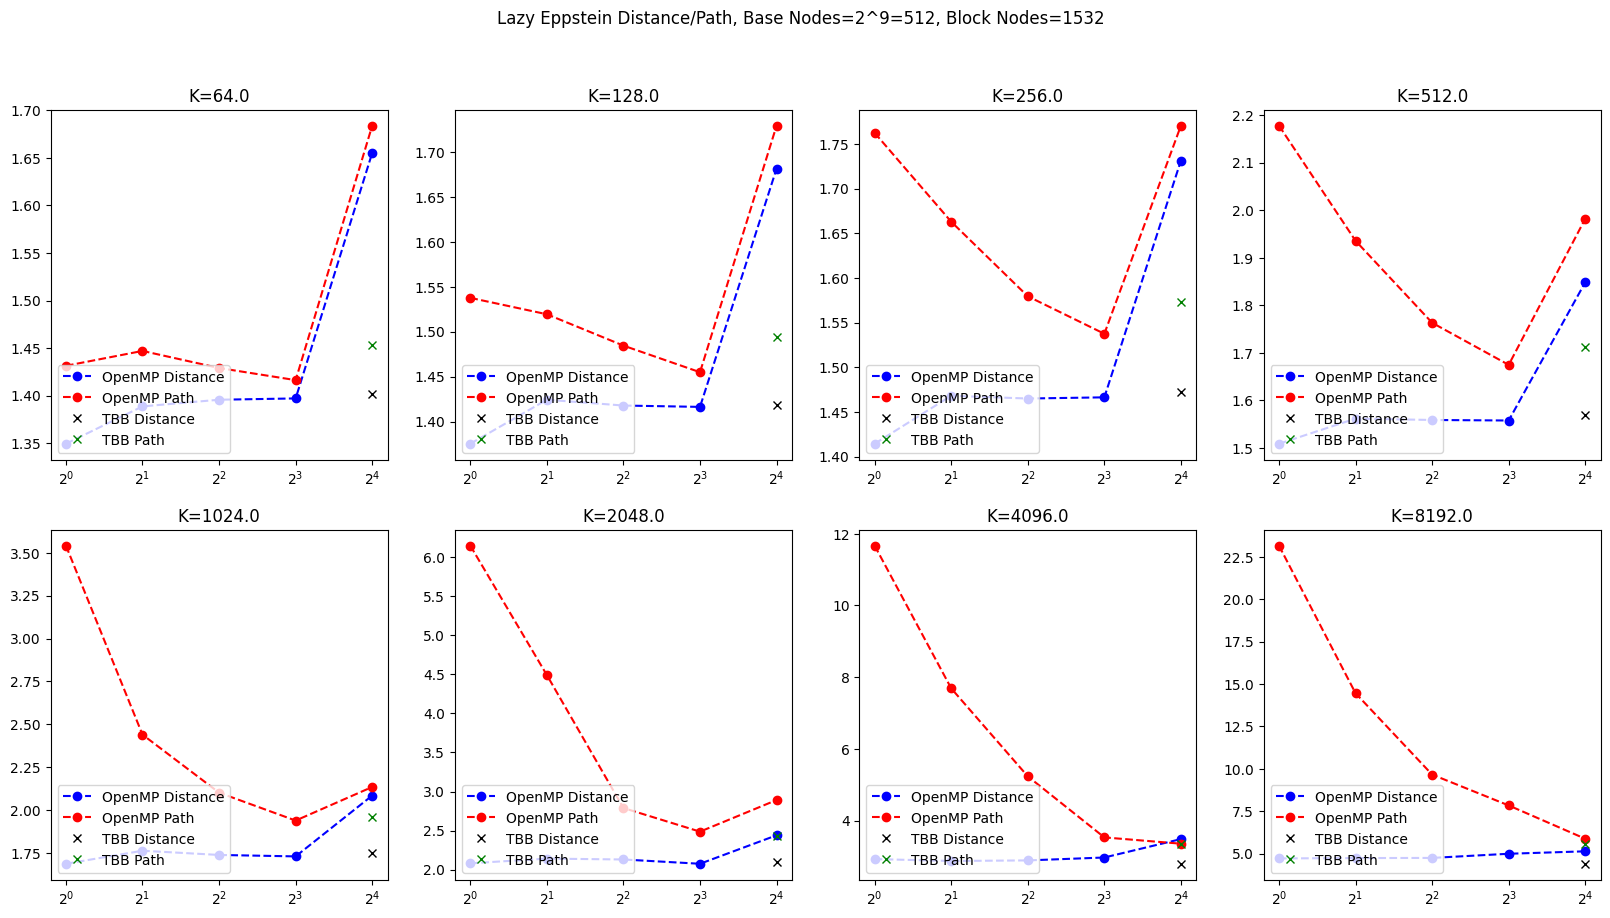

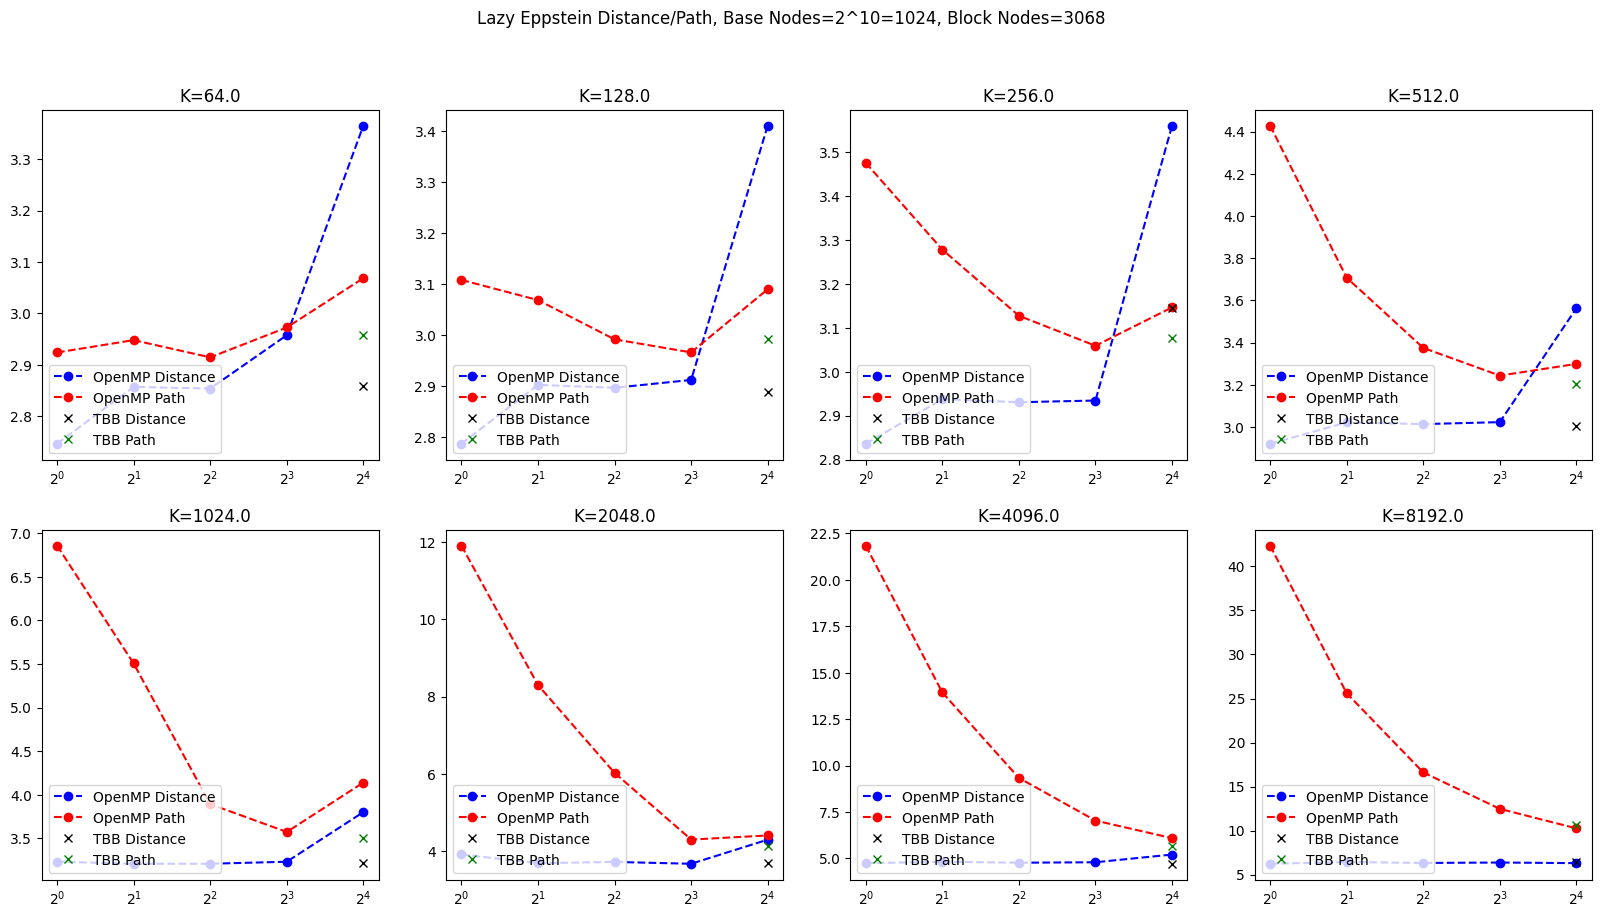

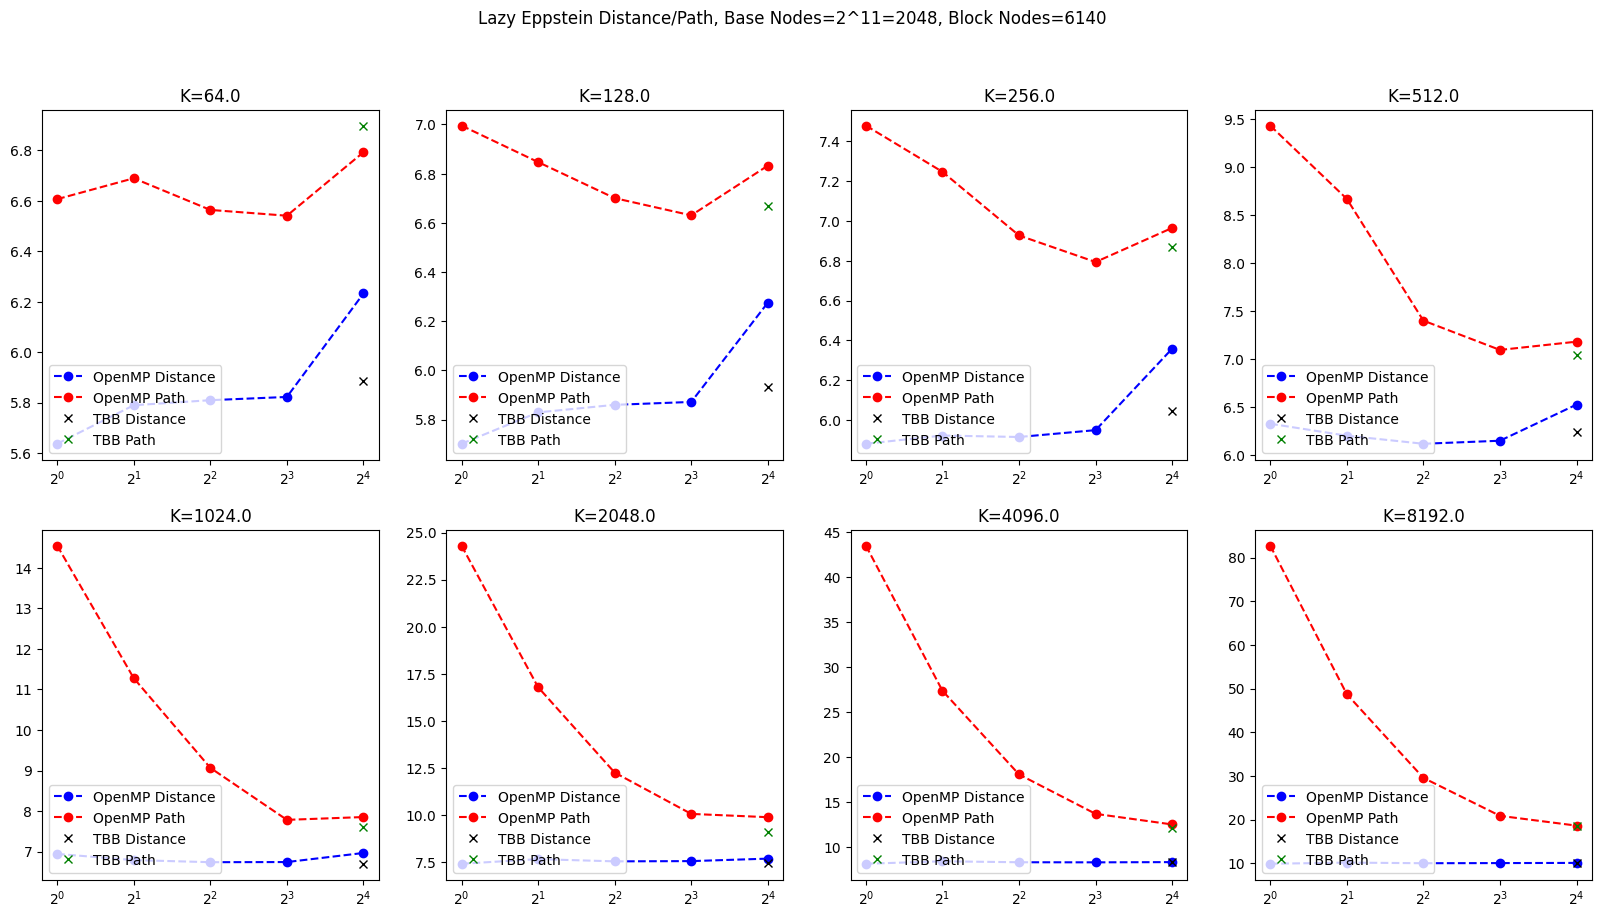

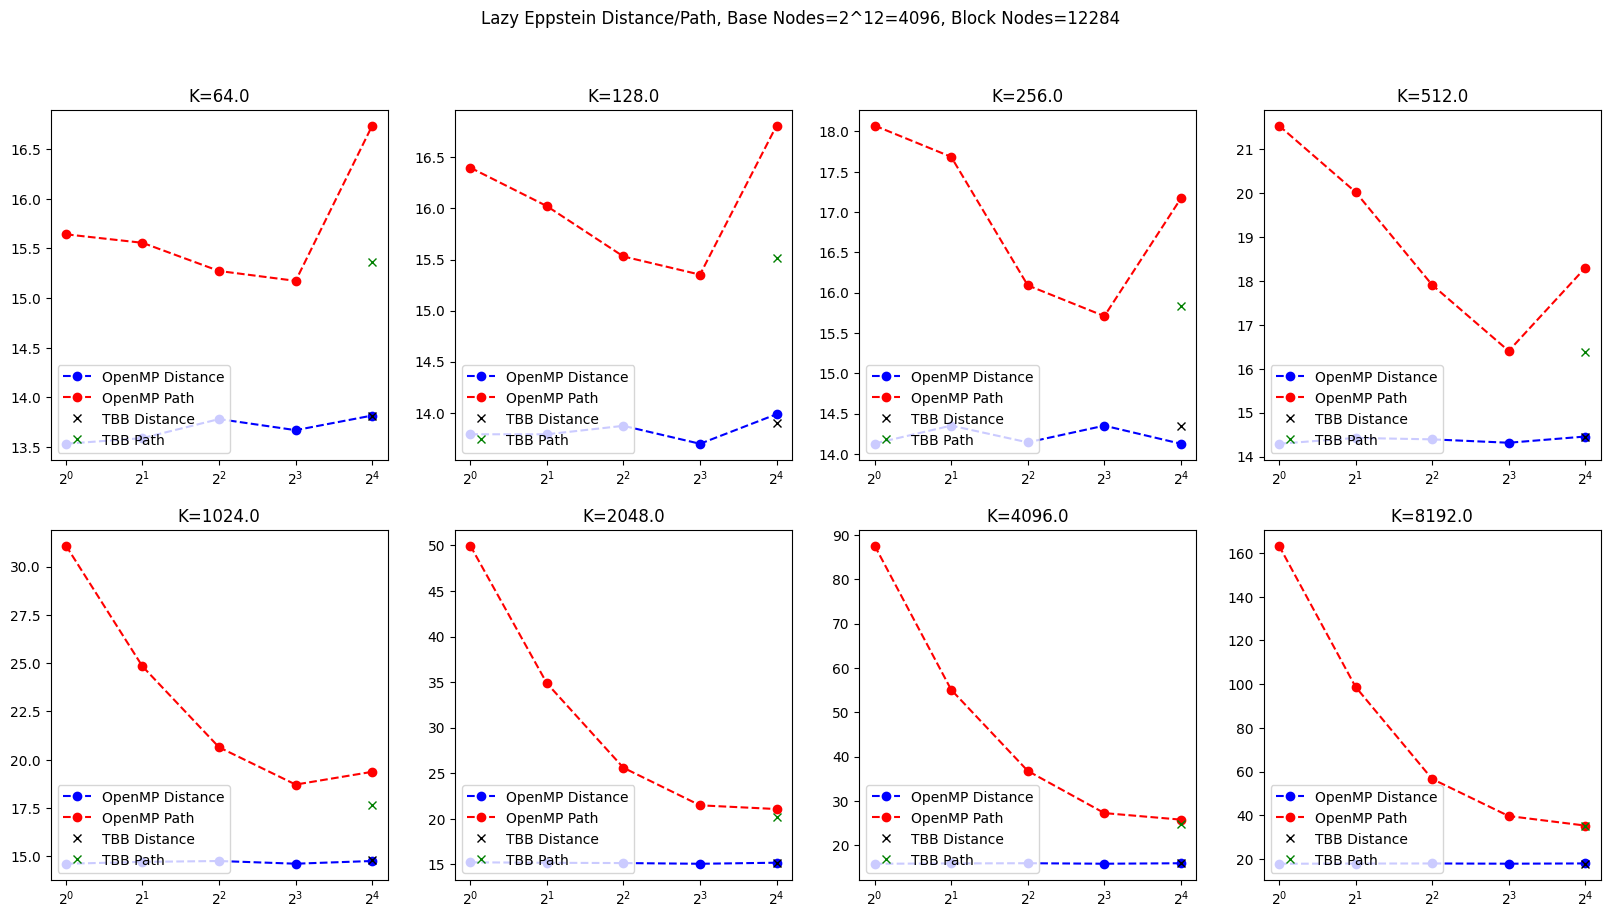

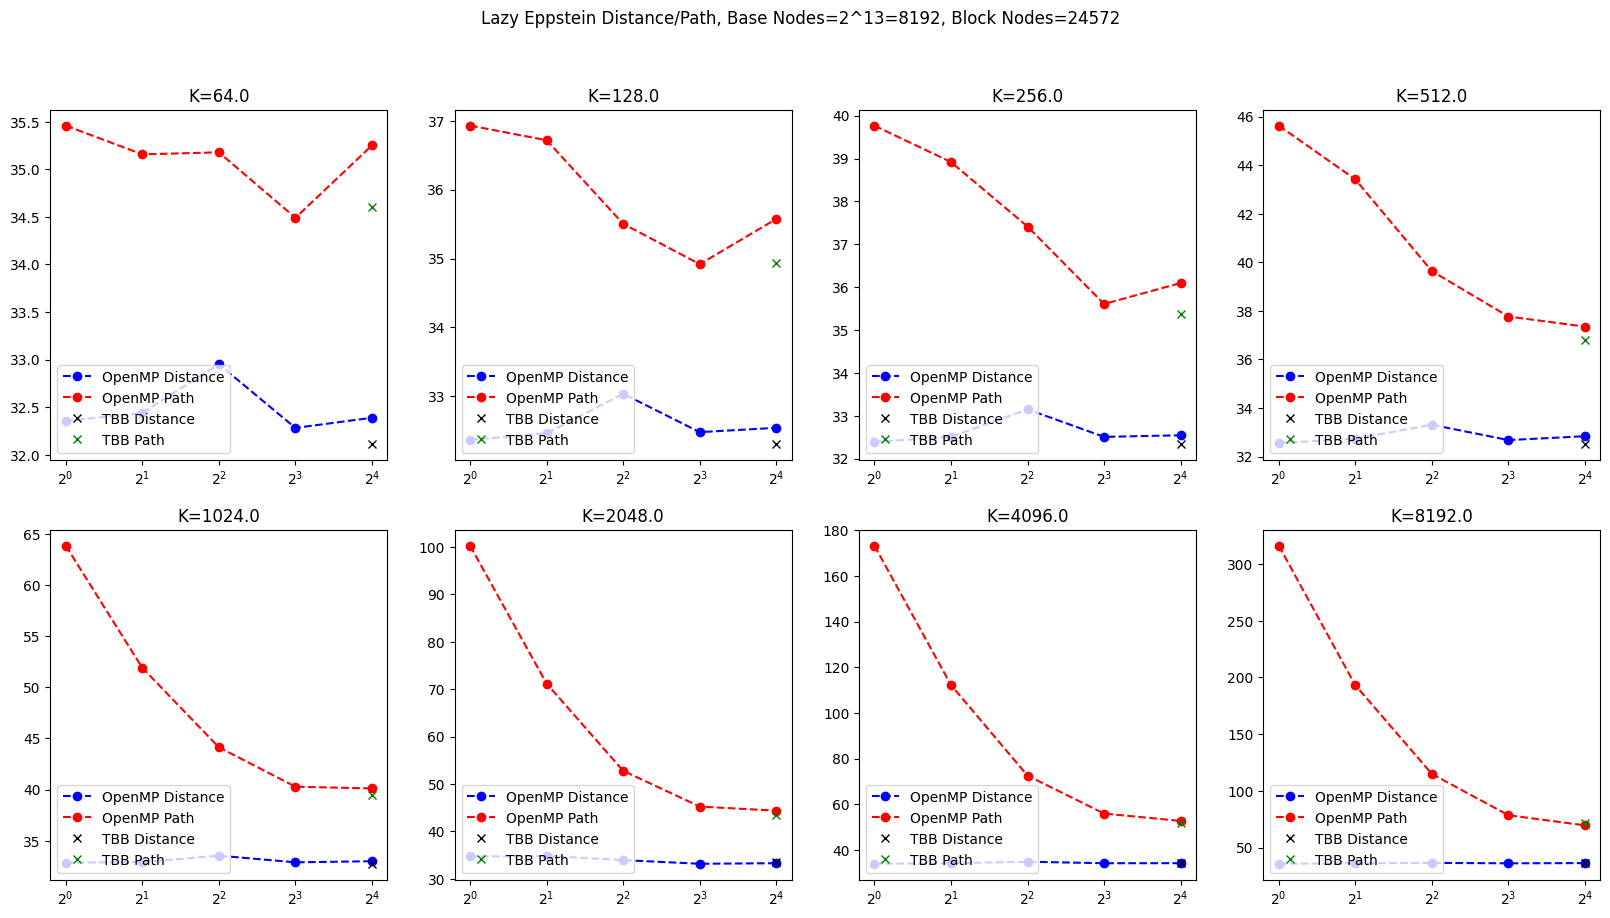

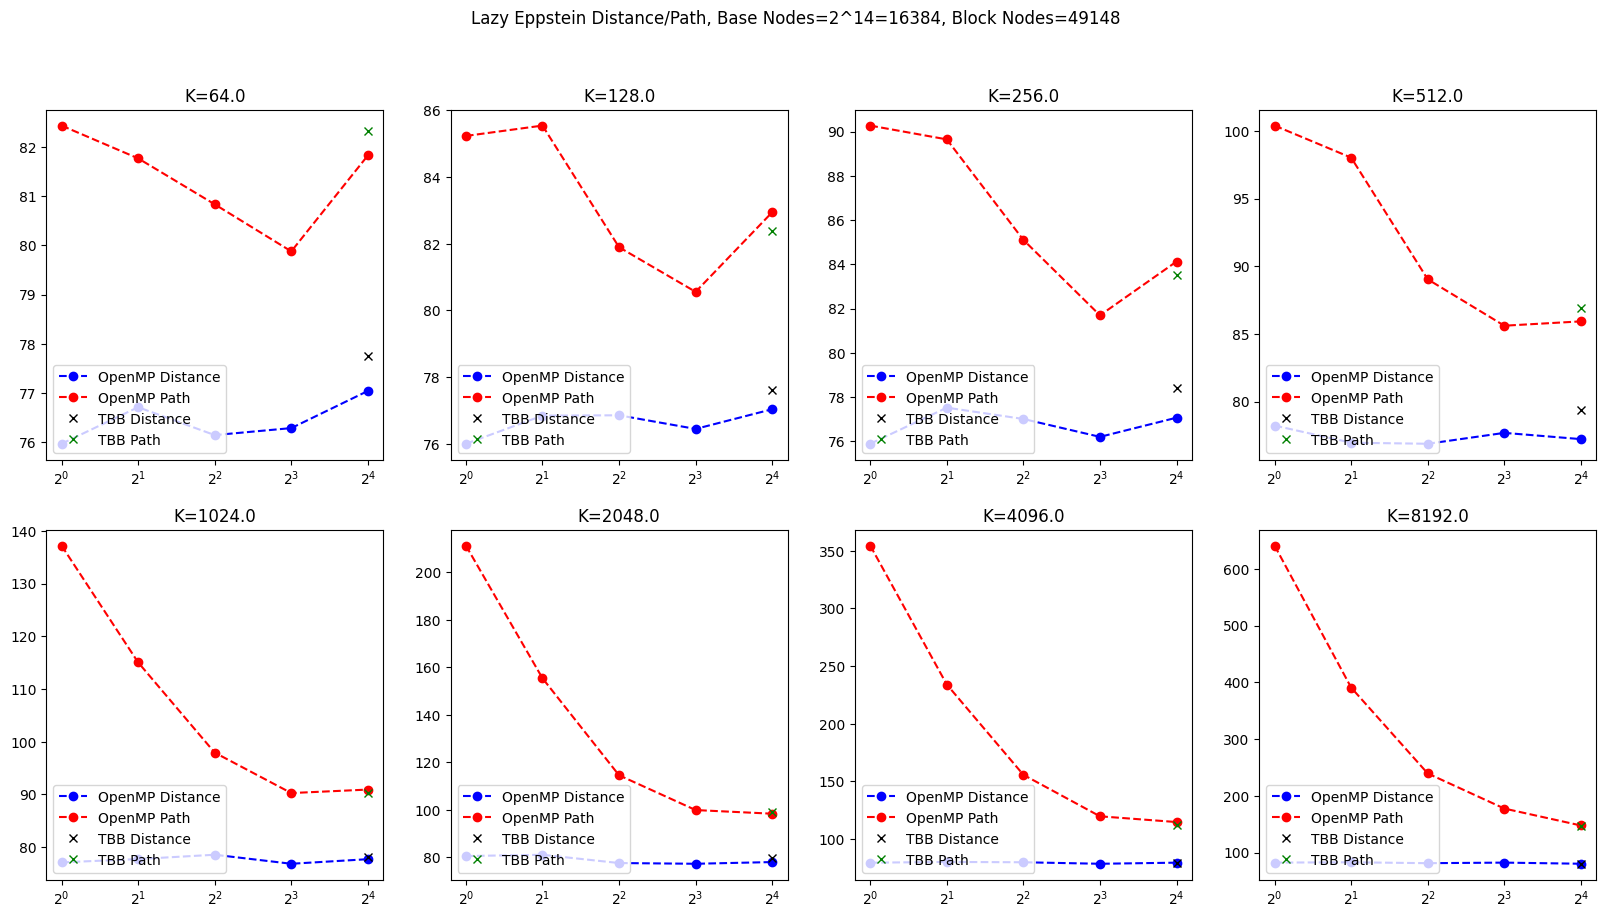

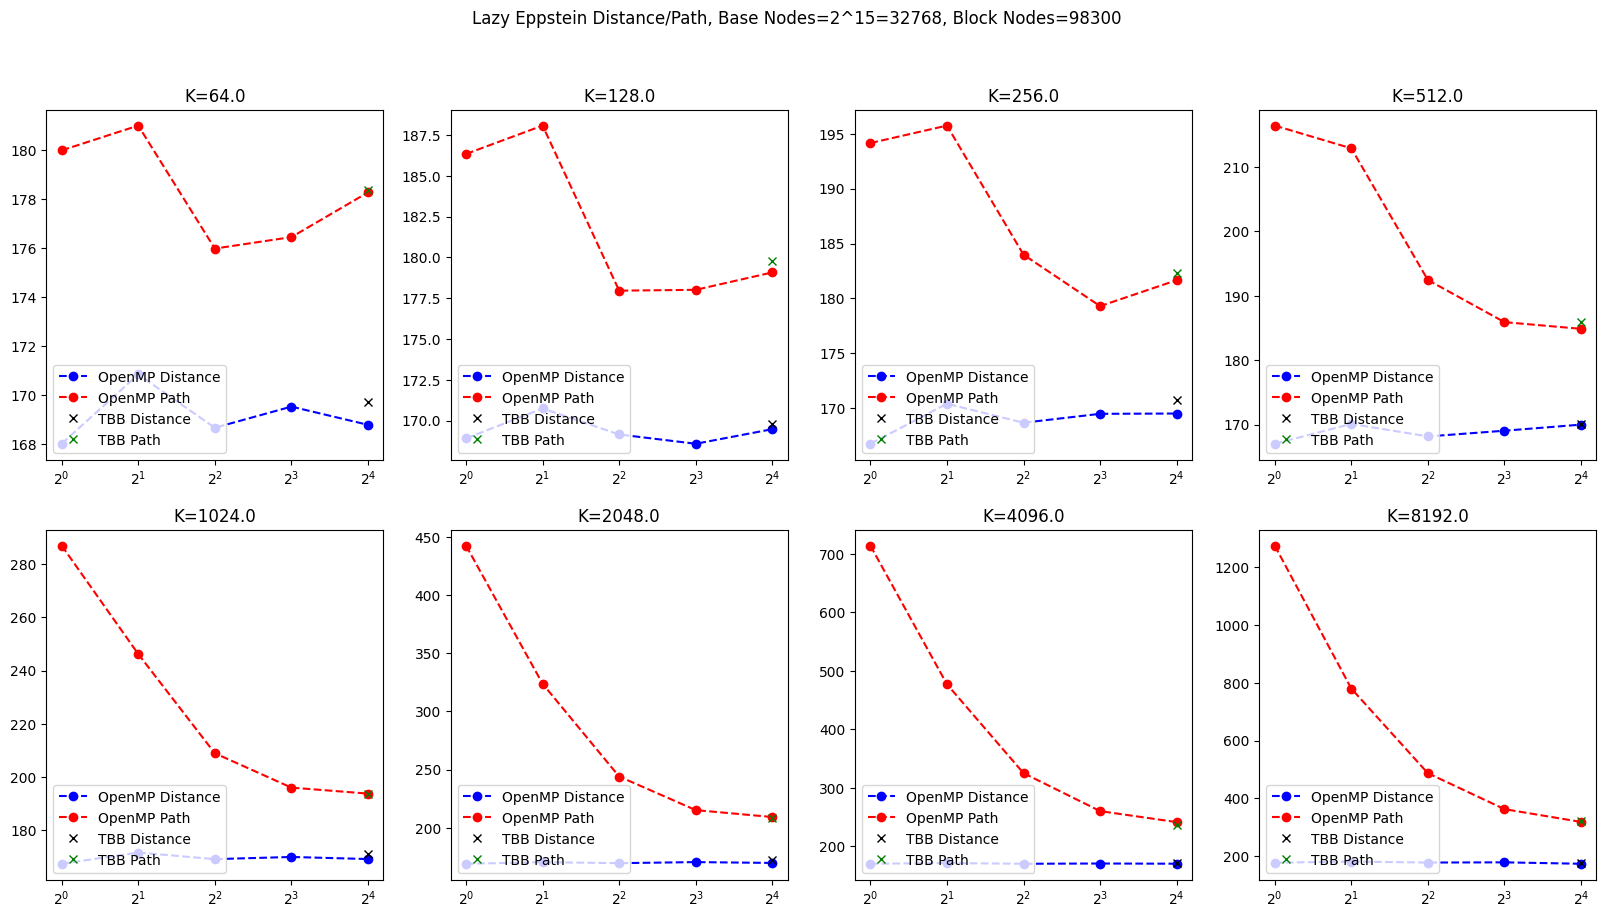

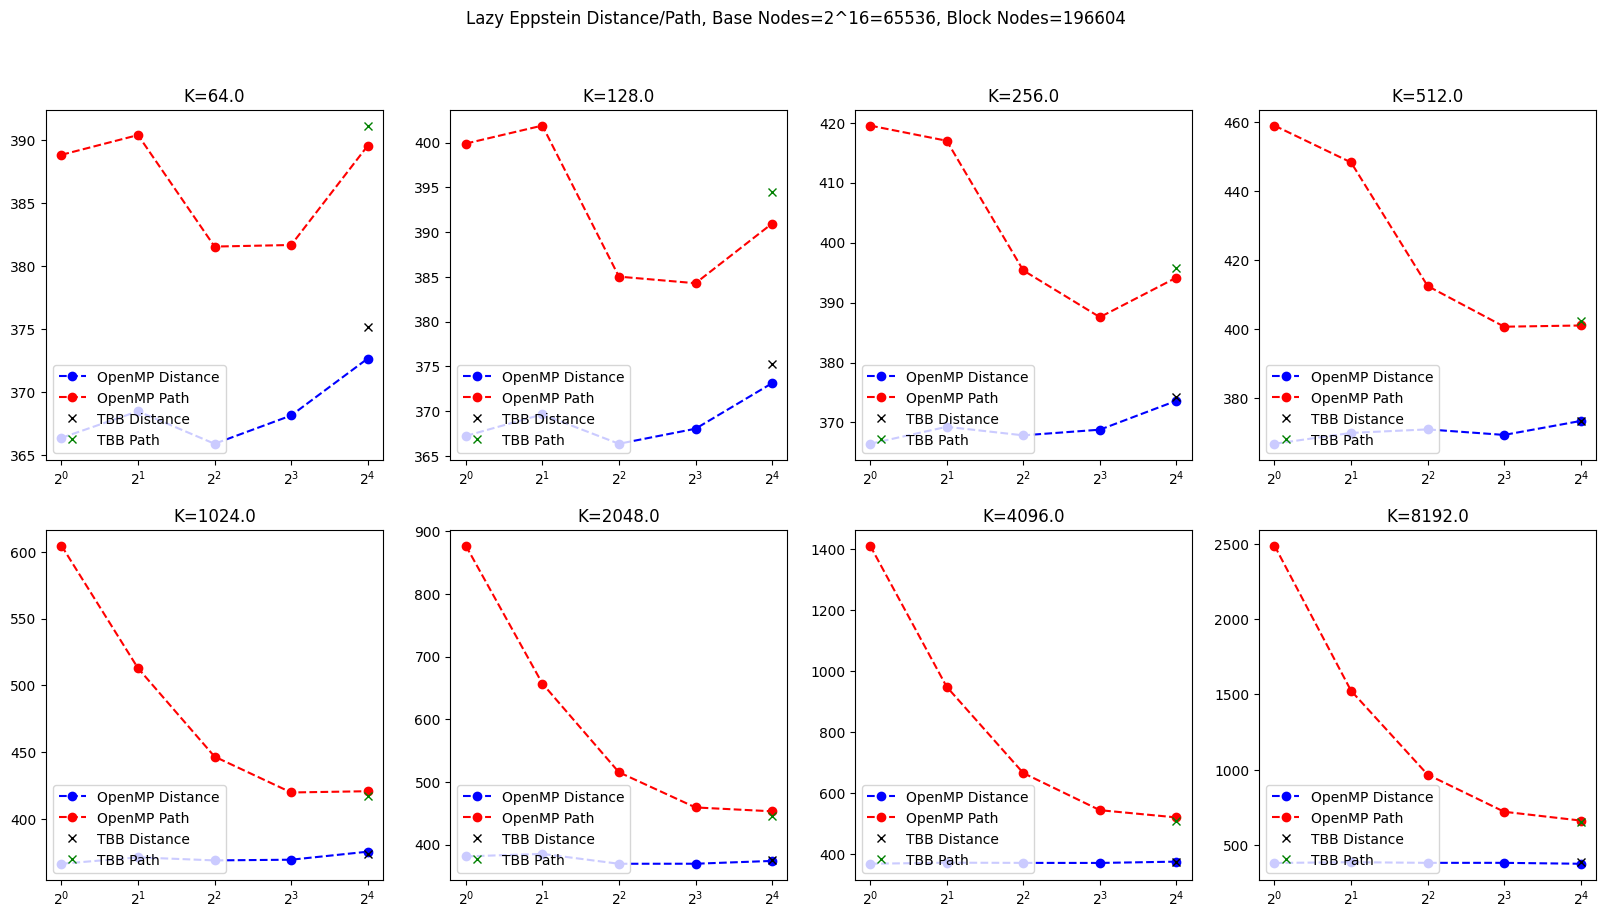

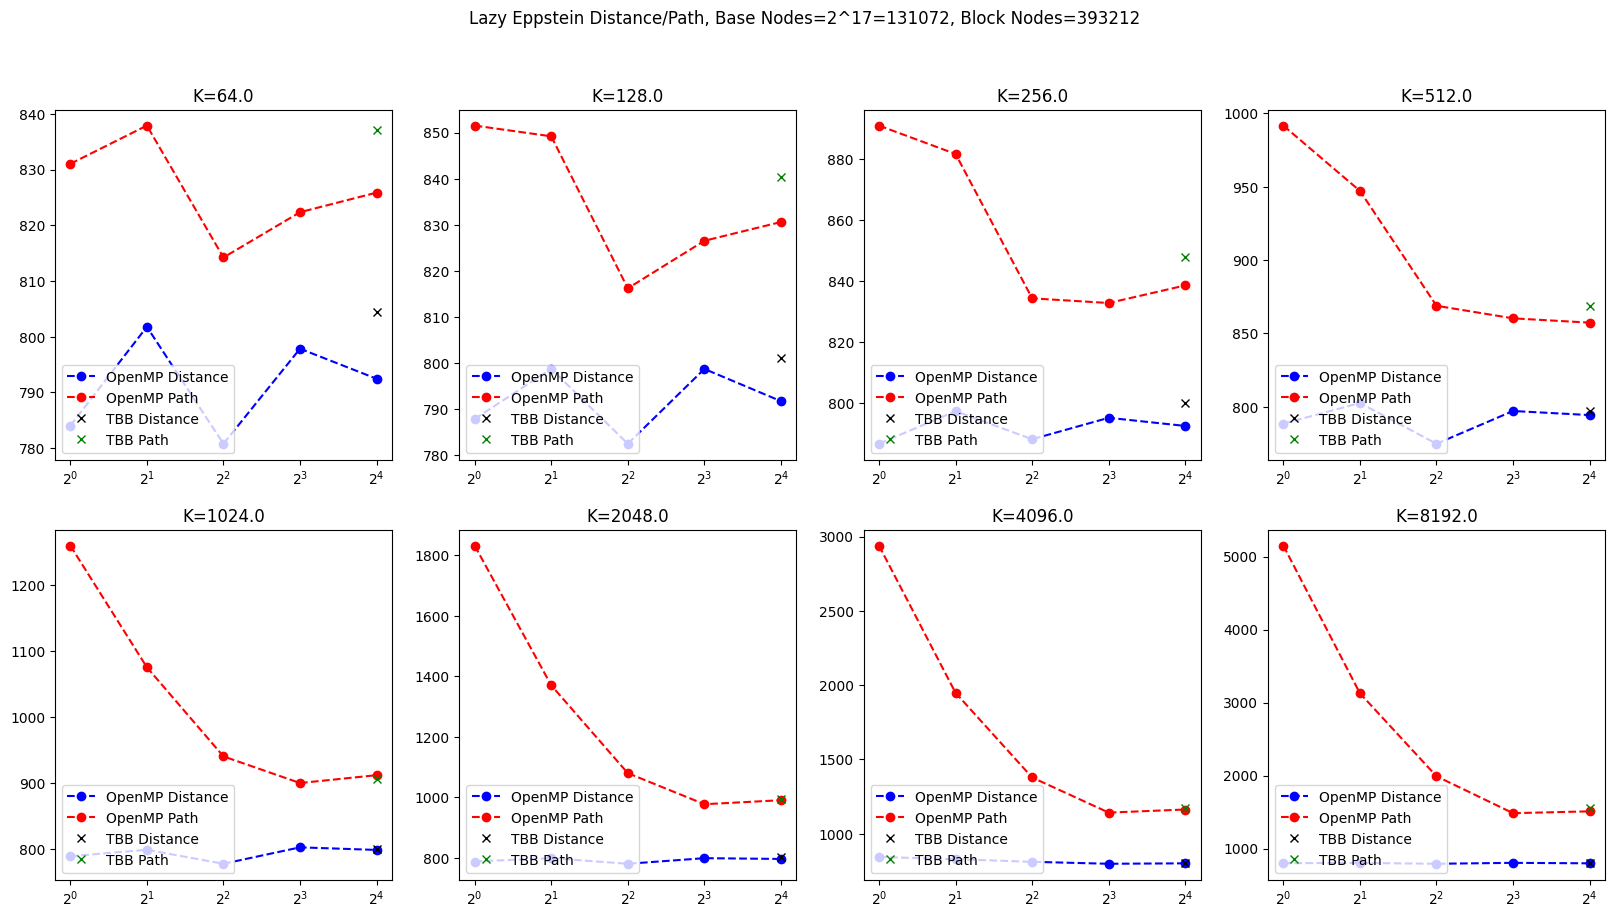

In [11]:
for i in range(11):
    fix, axs = plt.subplots(2, 4, figsize=(20, 10))

    fix.suptitle('Lazy Eppstein Distance/Path, Base Nodes=2^' + str(i+7) + '=' + str(pow(2,i+7)) + ", Block Nodes=" + str((pow(2,i+7)-2)*3+2))

    base_index = (i+2) * 8;

    for j in range(4):
        up = base_index + j


        axs[0, j].set_title('K=' + str(sequential_revision[up, 1]))

        axs[0, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, up, 4), '--bo')
        axs[0, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, up, 5), '--ro')
        axs[0, j].plot(16, tbb_revision[up, 4], 'kx')
        axs[0, j].plot(16, tbb_revision[up, 5], 'gx')

        axs[0, j].legend(['OpenMP Distance', 'OpenMP Path', 'TBB Distance', 'TBB Path'], loc='lower left')
        axs[0, j].set_xscale('log', base=2)


        dn = base_index + j + 4
        axs[1, j].set_title('K=' + str(sequential_revision[dn, 1]))

        axs[1, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, dn, 4), '--bo')
        axs[1, j].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, dn, 5), '--ro')
        axs[1, j].plot(16, tbb_revision[dn, 4], 'kx')
        axs[1, j].plot(16, tbb_revision[dn, 5], 'gx')

        axs[1, j].legend(['OpenMP Distance', 'OpenMP Path', 'TBB Distance', 'TBB Path'], loc='lower left')
        axs[1, j].set_xscale('log', base=2)